Given a electric dipole with charge $q$ and distance $d$, the electric potential ($V$) is given by:

$$ V(r) = k_e q \left( \frac{1}{r_2} - \frac{1}{r_1} \right) $$

and the electric field ($\vec{E}$) is given in its components by:


$$ E_x = k_eq \left( \frac{x-\frac{d}{2}}{r_2^2} - \frac{x+\frac{d}{2}}{r_1^2} \right)$$

$$ E_y = k_eq \thinspace y \left( \frac{1}{r_2^2} - \frac{1}{r_1^2} \right) $$

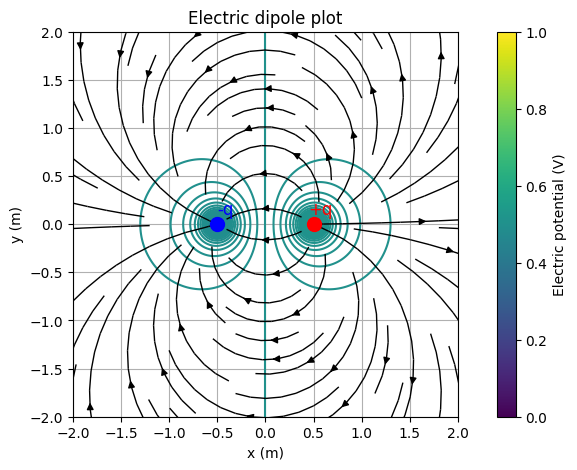

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.9875e9
q = 1.602e-19
d = 1.0

# Definir el tamaño y el rango del espacio de graficación
rango = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(rango, rango)

r1 = np.sqrt((X + d/2)**2 + Y**2)
r2 = np.sqrt((X - d/2)**2 + Y**2)

Ex = k*q*((X - d/2)/(r2*r2) - (x + d/2)/(r1*r1))
Ey = k*q*Y*(1/(r2*r2) - 1/(r1*r1))
V = k*q*(1/r2 - 1/r1)


plt.figure(figsize=(10, 5))
plt.contour(X, Y, V, levels = 1000)
plt.streamplot(X, Y, Ex, Ey, color = 'black', linewidth=1, arrowsize=1)
plt.plot(-d/2, 0, 'bo', markersize=10)
plt.plot(d/2, 0, 'ro', markersize=10)
plt.text(-d/2, 0.1, '-q', color='blue', fontsize=12, ha='left')
plt.text(d/2 - 0.05, 0.1, '+q', color='red', fontsize=12, ha='left')
plt.title('Electric dipole plot')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar(label='Electric potential (V)')
plt.show()